# Exercise B-3: Gradient descent

Suppose we are given a function $f(x, y)$ in two real variables. Assume that this function is convex. A simple example would be the function
$$f (x, y) = x2 + y2$$
which has a unique minimum at $(x, y) = (0, 0)$. Imagine that the function $z = f (x, y)$ describes a landscape (with $x$, $y$ in the plane, and $z$ as the vertical
coordinate). The gradient vector
$$\Delta{f(x, y)} = (fx, fy)$$
describes the direction in which the function $f$ increases the most at the point $(x, y)$, (or the direction of maximum decrease for $−\Delta{f(x, y)}$).

- Consider this fact for the simple function $f(x, y) = x^2 + y^2$. Sketch the *contour lines* $x^2 + y^2 =$ const and verify that the gradient vector $\Delta{f}$ is orthogonal to the contour lines at each point (sketch!). This property forms the basis for the gradient descent method, see also Exercise 4 below.
    
    To find a minimum in general, we proceed iteratively, starting from an initial approximation $(x0, y0)$:
    $$(x_1, y_1) := (x_0, y_0) − \gamma \Delta f(x_0, y_0)$$

    Here, $\gamma > 0$ is a parameter that needs to be chosen appropriately. Choosing $\gamma = 1$ might cause the iteration step to ’overshoot’.
    
    In this case, one might choose $\gamma = 1/2$ and repeat the process, etc.

- Implement and test this strategy for the model problem $f(x, y) = x^2 + y^2$.

----

What is convex?

- A function is convex if the line segment between any two points on the graph of the function lies above the graph.
- A function is convex if the second derivative is positive.
- A function is convex if the first derivative is increasing.
- A function is convex if the second derivative is increasing.
- ...

_For simplicity:_

Imagine a convex function as a bowl. The bottom of the bowl is the minimum of the function. The gradient descent method is like a ball rolling down the bowl to find the minimum. 

The gradient vector points in the direction of the steepest ascent. The negative gradient vector points in the direction of the steepest descent. 

The gradient descent method is to move in the direction of the negative gradient vector to find the minimum.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, init_printing, symbols, latex, det, Eq
from sympy.abc import A
from IPython.display import display, Math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [3]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{latex(matrix1[i, k])} \\cdot {latex(matrix2[k, j]) if matrix2.shape[1] > 1 else latex(matrix2[k])}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return result, latex_str

In [4]:
def gradient_descent(f, grad_f, x0, y0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a two-variable function.

    Parameters:
    - f: function to minimize
    - grad_f: gradient of the function
    - x0, y0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations

    Returns:
    - x_hist, y_hist: lists of x and y coordinates over iterations
    """
    x, y = x0, y0
    x_hist, y_hist = [x], [y]
    for _ in range(max_iter):
        grad_x, grad_y = grad_f(x, y)
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y

        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break

        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)

    return x_hist, y_hist

In [5]:
# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

In [6]:
# Initial point and parameters
x0, y0 = 2.0, 2.0  # Starting at (2, 2)
gamma = 0.1         # Learning rate

In [7]:
# Perform gradient descent
x_hist, y_hist = gradient_descent(f, grad_f, x0, y0, gamma)

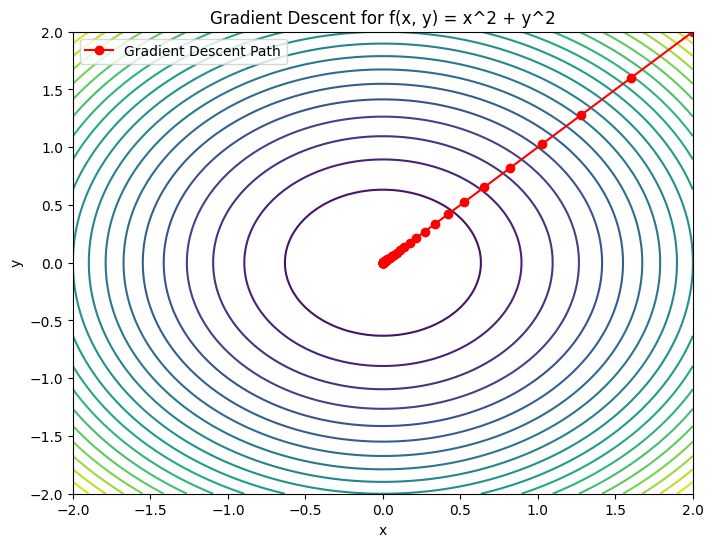

In [8]:
# Visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.plot(x_hist, y_hist, 'ro-', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent for f(x, y) = x^2 + y^2")
plt.legend()
plt.show()

In [9]:
print(f"Converged to minimum at: x = {x_hist[-1]:.6f}, y = {y_hist[-1]:.6f}")

Converged to minimum at: x = 0.000003, y = 0.000003


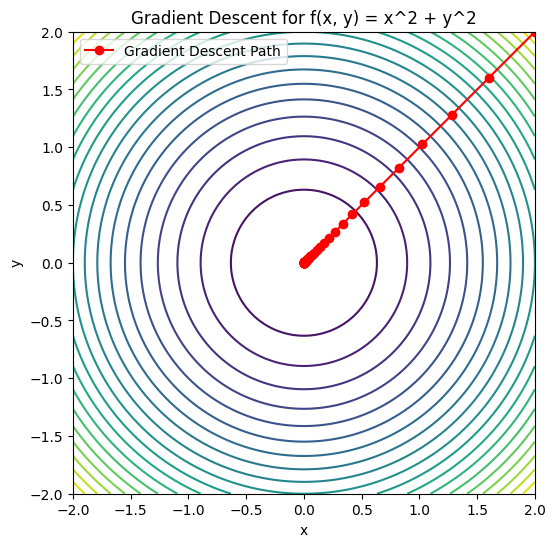

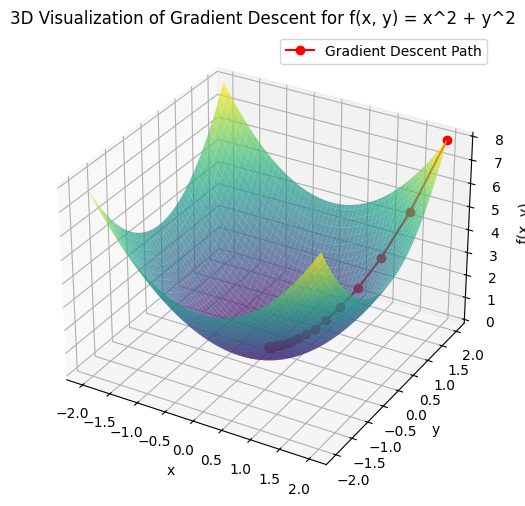

Converged to minimum at: x = 0.000003, y = 0.000003


In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, init_printing, symbols, latex, det, Eq
from sympy.abc import A
from IPython.display import display, Math

def gradient_descent(f, grad_f, x0, y0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a two-variable function.

    Parameters:
    - f: function to minimize
    - grad_f: gradient of the function
    - x0, y0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations

    Returns:
    - x_hist, y_hist: lists of x and y coordinates over iterations
    """
    x, y = x0, y0
    x_hist, y_hist = [x], [y]
    for _ in range(max_iter):
        grad_x, grad_y = grad_f(x, y)
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y

        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break

        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)

    return x_hist, y_hist

# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

# Initial point and parameters
x0, y0 = 2.0, 2.0  # Starting at (2, 2)
gamma = 0.1         # Learning rate

# Perform gradient descent
x_hist, y_hist = gradient_descent(f, grad_f, x0, y0, gamma)

# Visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# 2D Contour Plot
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.plot(x_hist, y_hist, 'ro-', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent for f(x, y) = x^2 + y^2")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

# 3D Surface Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
ax.plot(x_hist, y_hist, f(np.array(x_hist), np.array(y_hist)), 'ro-', label="Gradient Descent Path")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("3D Visualization of Gradient Descent for f(x, y) = x^2 + y^2")
plt.legend()
plt.show()

print(f"Converged to minimum at: x = {x_hist[-1]:.6f}, y = {y_hist[-1]:.6f}")
